In [70]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [71]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier..keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [72]:
NUM_CLASSES = 6

# Dataset reading

In [73]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [74]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [78]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [80]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [81]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 20s 732ms/step - accuracy: 0.0859 - loss: 2.0443
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier..keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1384 - loss: 1.8839 - val_accuracy: 0.3229 - val_loss: 1.6052
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2812 - loss: 1.6301
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier..keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2951 - loss: 1.6234 - val_accuracy: 0.3929 - val_loss: 1.4699
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3359 - loss: 1.5383
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier..keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.4911 - val_accuracy: 0.4201 - val_loss: 1.3628
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3203 - loss: 1.3932
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.

In [82]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9456 - loss: 0.2623 


In [83]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [84]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[4.5716474e-03 6.8757616e-02 9.2109072e-01 2.1326465e-04 4.9124486e-03
 4.5429860e-04]
2


# Confusion matrix

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


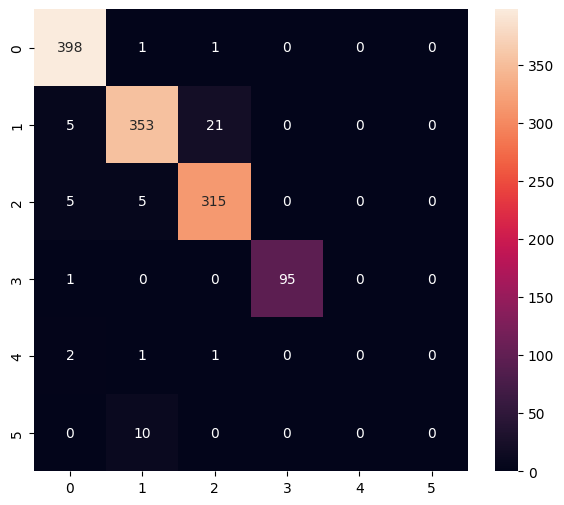

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       0.95      0.93      0.94       379
           2       0.93      0.97      0.95       325
           3       1.00      0.99      0.99        96
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        10

    accuracy                           0.96      1214
   macro avg       0.64      0.65      0.64      1214
weighted avg       0.95      0.96      0.95      1214



c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [87]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [88]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Rodrigo\AppData\Local\Temp\tmprxr_8a_x\assets


INFO:tensorflow:Assets written to: C:\Users\Rodrigo\AppData\Local\Temp\tmprxr_8a_x\assets


Saved artifact at 'C:\Users\Rodrigo\AppData\Local\Temp\tmprxr_8a_x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2912197912016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2912197916048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2912197914896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2912197915088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2912197914128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2912197912784: TensorSpec(shape=(), dtype=tf.resource, name=None)


6644

# Inference test

In [89]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [90]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [91]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [92]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [93]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.5716469e-03 6.8757601e-02 9.2109072e-01 2.1326463e-04 4.9124509e-03
 4.5429860e-04]
2
